## Process the Gutenberg corpus

This section demonstrates text analysis on a complete literary work from the Gutenberg corpus. Working with real-world text corpora is crucial for data scientists to understand text preprocessing, frequency analysis, and linguistic patterns at scale. These techniques form the foundation for text mining, content analysis, and understanding language patterns in large datasets.

In [ ]:
# Import necessary NLTK modules for text analysis
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import Tree
from nltk.draw import tree

# Download necessary NLTK resources
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

# Load the raw text of Jane Austen's "Emma" from the Gutenberg corpus
emma = gutenberg.raw('austen-emma.txt')

# Tokenize the text into individual words
tokens = word_tokenize(emma)

# Perform basic text preprocessing
tokens = [token.lower() for token in tokens if token.isalpha()]
tokens = [token for token in tokens if token not in stopwords.words('english')]

# Perform frequency distribution analysis to find most common words
fdist = FreqDist(tokens)
most_common = fdist.most_common(10)
print("Most common words:")
for word, frequency in most_common:
    print(f"{word}: {frequency}")

# Perform part-of-speech tagging on the first 100 tokens
# Tags identify word types: NN=noun, VB=verb, JJ=adjective, etc.
tagged_tokens = nltk.pos_tag(tokens[:100])
print("\nPart-of-speech tagging:")
for token, tag in tagged_tokens:
    print(f"{token}: {tag}")

# Perform lemmatization (reduce words to their base form)
# Example: "running" -> "run", "better" -> "good"
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens[:100]]
print("\nLemmatization:")
for token, lemma in zip(tokens[:100], lemmatized_tokens):
    print(f"{token}: {lemma}")

# Perform treebank parsing and visualization
# Create a parse tree structure from the tagged tokens
parsed_sent = Tree.fromstring('(S ' + ' '.join([f'({tag} {token})' for token, tag in tagged_tokens]) + ')')
print("\nTreebank Visualization:")
parsed_sent.pretty_print()

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\zpoke\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zpoke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zpoke\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zpoke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zpoke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zpoke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!

Most common words:
emma: 860
could: 836
would: 818
miss: 599
must: 566
harriet: 500
much: 484
said: 483
one: 447
weston: 437

Part-of-speech tagging:
emma: NN
jane: NN
austen: JJ
volume: NN
chapter: NN
emma: NN
woodhouse: IN
handsome: JJ
clever: NN
rich: JJ
comfortable: JJ
home: NN
happy: JJ
disposition: NN
seemed: VBD
unite: JJ
best: JJS
blessings: NNS
existence: NN
lived: VBD
nearly: RB
years: NNS
world: NN
little: JJ
distress: JJ
vex: NN
youngest: JJS
two: CD
daughters: NNS
affectionate: VBP
indulgent: NN
father: NN
consequence: NN
sister: NN
marriage: NN
mistress: NN
house: NN
early: JJ
period: NN
mother: NN
died: VBD
long: JJ
ago: RB
indistinct: JJ
remembrance: NN
caresses: NNS
place: VBP
supplied: JJ
excellent: JJ
woman: NN
governess: NN
fallen: VBN
little: JJ
short: JJ
mother: NN
affection: NN
sixteen: JJ
years: NNS
miss: VBP
taylor: NN
woodhouse: IN
family: NN
less: JJR
governess: JJ
friend: NN
fond: NN
daughters: NNS
particularly: RB
emma: VBP
intimacy: NN
sisters: NNS
even: R

## Text Similarity Analysis

Text similarity measures how alike two documents are using various algorithms. This is fundamental for data scientists building recommendation systems, duplicate detection, plagiarism checking, document clustering, and search engines. Understanding different similarity metrics helps choose the right approach for specific use cases and data characteristics.

In [ ]:
# Import libraries for text similarity
from nltk.metrics import jaccard_distance, edit_distance
from collections import Counter
import math

# Sample documents to compare
documents = {
    "Doc 1": "The cat sat on the mat with a hat",
    "Doc 2": "The dog sat on the log with a frog",
    "Doc 3": "A cat and dog played in the park",
    "Doc 4": "Machine learning and artificial intelligence are transforming technology"
}

def preprocess_text(text):
    """Tokenize and clean text"""
    tokens = word_tokenize(text.lower())
    return [token for token in tokens if token.isalpha()]

def jaccard_similarity(text1, text2):
    """
    Calculate Jaccard Similarity (0 to 1, higher = more similar)
    """
    set1 = set(preprocess_text(text1))
    set2 = set(preprocess_text(text2))
    
    # Calculate intersection and union
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    
    if len(union) == 0:
        return 0
    
    similarity = len(intersection) / len(union)
    return similarity

def cosine_similarity(text1, text2):
    """
    Calculate Cosine Similarity (0 to 1, higher = more similar)
    """
    # Get word counts
    words1 = preprocess_text(text1)
    words2 = preprocess_text(text2)
    
    counter1 = Counter(words1)
    counter2 = Counter(words2)
    
    # Get all unique words
    all_words = set(counter1.keys()).union(set(counter2.keys()))
    
    # Create vectors
    vector1 = [counter1.get(word, 0) for word in all_words]
    vector2 = [counter2.get(word, 0) for word in all_words]
    
    # Calculate dot product and magnitudes
    dot_product = sum(v1 * v2 for v1, v2 in zip(vector1, vector2))
    magnitude1 = math.sqrt(sum(v * v for v in vector1))
    magnitude2 = math.sqrt(sum(v * v for v in vector2))
    
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    
    similarity = dot_product / (magnitude1 * magnitude2)
    return similarity

def levenshtein_similarity(text1, text2):
    """
    Calculate similarity based on edit distance (0 to 1, higher = more similar)
    """
    distance = edit_distance(text1.lower(), text2.lower())
    max_len = max(len(text1), len(text2))
    
    if max_len == 0:
        return 1.0
    
    similarity = 1 - (distance / max_len)
    return similarity

# Display documents
print("TEXT SIMILARITY ANALYSIS")
print("="*70)
print("\nDocuments to compare:")
print("-"*70)
for doc_name, doc_text in documents.items():
    print(f"{doc_name}: \"{doc_text}\"")

# Calculate all pairwise similarities
print("\n" + "="*70)
print("JACCARD SIMILARITY (based on word overlap):")
print("-"*70)
doc_names = list(documents.keys())
for i in range(len(doc_names)):
    for j in range(i + 1, len(doc_names)):
        doc1_name, doc2_name = doc_names[i], doc_names[j]
        doc1_text = documents[doc1_name]
        doc2_text = documents[doc2_name]
        
        similarity = jaccard_similarity(doc1_text, doc2_text)
        print(f"{doc1_name} vs {doc2_name}: {similarity:.4f} ({similarity*100:.1f}%)")

print("\n" + "="*70)
print("COSINE SIMILARITY (based on word frequency vectors):")
print("-"*70)
for i in range(len(doc_names)):
    for j in range(i + 1, len(doc_names)):
        doc1_name, doc2_name = doc_names[i], doc_names[j]
        doc1_text = documents[doc1_name]
        doc2_text = documents[doc2_name]
        
        similarity = cosine_similarity(doc1_text, doc2_text)
        print(f"{doc1_name} vs {doc2_name}: {similarity:.4f} ({similarity*100:.1f}%)")

print("\n" + "="*70)
print("LEVENSHTEIN SIMILARITY (based on character edit distance):")
print("-"*70)
for i in range(len(doc_names)):
    for j in range(i + 1, len(doc_names)):
        doc1_name, doc2_name = doc_names[i], doc_names[j]
        doc1_text = documents[doc1_name]
        doc2_text = documents[doc2_name]
        
        similarity = levenshtein_similarity(doc1_text, doc2_text)
        print(f"{doc1_name} vs {doc2_name}: {similarity:.4f} ({similarity*100:.1f}%)")

# Find most similar pair
print("\n" + "="*70)
print("FINDING MOST SIMILAR DOCUMENTS:")
print("-"*70)

max_similarity = 0
most_similar_pair = None

for i in range(len(doc_names)):
    for j in range(i + 1, len(doc_names)):
        doc1_name, doc2_name = doc_names[i], doc_names[j]
        doc1_text = documents[doc1_name]
        doc2_text = documents[doc2_name]
        
        # Use cosine similarity as primary metric
        similarity = cosine_similarity(doc1_text, doc2_text)
        
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_pair = (doc1_name, doc2_name)

if most_similar_pair:
    print(f"Most similar documents: {most_similar_pair[0]} and {most_similar_pair[1]}")
    print(f"Cosine similarity: {max_similarity:.4f} ({max_similarity*100:.1f}%)")
    print(f"\n{most_similar_pair[0]}: \"{documents[most_similar_pair[0]]}\"")
    print(f"{most_similar_pair[1]}: \"{documents[most_similar_pair[1]]}\"")

# Explain the metrics
print("\n" + "="*70)
print("SIMILARITY METRICS EXPLAINED:")
print("-"*70)
print("• Jaccard Similarity: Measures word overlap (ignores frequency)")
print("  - Good for: Finding documents with similar vocabulary")
print("  - Range: 0 (no overlap) to 1 (identical words)")
print()
print("• Cosine Similarity: Measures angle between word frequency vectors")
print("  - Good for: Comparing documents considering word importance")
print("  - Range: 0 (completely different) to 1 (identical)")
print()
print("• Levenshtein Similarity: Measures character-level edits needed")
print("  - Good for: Finding typos, near-duplicate text")
print("  - Range: 0 (completely different) to 1 (identical)")

TEXT SIMILARITY ANALYSIS

Documents to compare:
----------------------------------------------------------------------
Doc 1: "The cat sat on the mat with a hat"
Doc 2: "The dog sat on the log with a frog"
Doc 3: "A cat and dog played in the park"
Doc 4: "Machine learning and artificial intelligence are transforming technology"

JACCARD SIMILARITY (based on word overlap):
----------------------------------------------------------------------
Doc 1 vs Doc 2: 0.4545 (45.5%)
Doc 1 vs Doc 3: 0.2308 (23.1%)
Doc 1 vs Doc 4: 0.0000 (0.0%)
Doc 2 vs Doc 3: 0.2308 (23.1%)
Doc 2 vs Doc 4: 0.0000 (0.0%)
Doc 3 vs Doc 4: 0.0667 (6.7%)

COSINE SIMILARITY (based on word frequency vectors):
----------------------------------------------------------------------
Doc 1 vs Doc 2: 0.7273 (72.7%)
Doc 1 vs Doc 3: 0.4264 (42.6%)
Doc 1 vs Doc 4: 0.0000 (0.0%)
Doc 2 vs Doc 3: 0.4264 (42.6%)
Doc 2 vs Doc 4: 0.0000 (0.0%)
Doc 3 vs Doc 4: 0.1250 (12.5%)

LEVENSHTEIN SIMILARITY (based on character edit distance):
--

## Named Entity Recognition on Custom Text

Named Entity Recognition (NER) automatically identifies and classifies entities like people, organizations, locations, and dates in text. This is critical for data scientists building information extraction systems, knowledge graphs, automated fact-checking, news analysis, and understanding relationships between entities in unstructured text data.

In [ ]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

# Sample news article text
article = """
Apple Inc. announced today that CEO Tim Cook will visit Paris, France next month to meet with 
President Emmanuel Macron. The meeting, scheduled for March 15, 2024, will discuss technology 
innovation and digital privacy regulations. Apple's headquarters in Cupertino, California has 
been the center of major product launches. Microsoft and Google are also planning similar visits 
to European capitals. The European Union has been working closely with American tech companies 
on data protection policies. Amazon's Jeff Bezos previously met with officials in Berlin, Germany 
last year.
"""

# Tokenize and perform POS tagging
tokens = word_tokenize(article)
tagged = nltk.pos_tag(tokens)

# Perform Named Entity Recognition
print("NAMED ENTITY RECOGNITION (NER)")
print("="*70)
print("\nOriginal Text:")
print("-"*70)
print(article)

# Extract named entities
entities = nltk.ne_chunk(tagged, binary=False)

print("\n" + "="*70)
print("EXTRACTED NAMED ENTITIES:")
print("-"*70)

# Organize entities by type
entity_dict = {}

for chunk in entities:
    if hasattr(chunk, 'label'):
        entity_type = chunk.label()
        entity_text = ' '.join(c[0] for c in chunk)
        
        if entity_type not in entity_dict:
            entity_dict[entity_type] = []
        entity_dict[entity_type].append(entity_text)

# Display organized entities
for entity_type, entity_list in sorted(entity_dict.items()):
    print(f"\n{entity_type} ({len(entity_list)} found):")
    # Remove duplicates and display
    unique_entities = list(set(entity_list))
    for entity in unique_entities:
        print(f"  • {entity}")

# Entity type descriptions
print("\n" + "="*70)
print("ENTITY TYPE DESCRIPTIONS:")
print("-"*70)
entity_types = {
    'PERSON': 'People, including fictional characters',
    'ORGANIZATION': 'Companies, agencies, institutions',
    'GPE': 'Geopolitical entities (countries, cities, states)',
    'LOCATION': 'Non-GPE locations (mountains, bodies of water)',
    'DATE': 'Absolute or relative dates or periods',
    'TIME': 'Times smaller than a day',
    'MONEY': 'Monetary values',
    'PERCENT': 'Percentages',
    'FACILITY': 'Buildings, airports, highways, bridges',
    'GSP': 'Geopolitical entities'
}

for etype, description in entity_types.items():
    if etype in entity_dict:
        print(f"  {etype}: {description}")

# Visualize the entity tree structure
print("\n" + "="*70)
print("ENTITY TREE STRUCTURE:")
print("-"*70)
# Display first 20 chunks for readability
entity_sample = entities[:30]
for item in entity_sample:
    print(item)

# Count statistics
print("\n" + "="*70)
print("STATISTICS:")
print("-"*70)
total_entities = sum(len(entity_list) for entity_list in entity_dict.values())
print(f"Total entities found: {total_entities}")
print(f"Entity types found: {len(entity_dict)}")
print(f"Total tokens: {len(tokens)}")
print(f"Entity density: {total_entities/len(tokens)*100:.1f}% of tokens are named entities")

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\zpoke\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\zpoke\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


NAMED ENTITY RECOGNITION (NER)

Original Text:
----------------------------------------------------------------------

Apple Inc. announced today that CEO Tim Cook will visit Paris, France next month to meet with 
President Emmanuel Macron. The meeting, scheduled for March 15, 2024, will discuss technology 
innovation and digital privacy regulations. Apple's headquarters in Cupertino, California has 
been the center of major product launches. Microsoft and Google are also planning similar visits 
to European capitals. The European Union has been working closely with American tech companies 
on data protection policies. Amazon's Jeff Bezos previously met with officials in Berlin, Germany 
last year.


EXTRACTED NAMED ENTITIES:
----------------------------------------------------------------------

GPE (9 found):
  • Germany
  • American
  • Berlin
  • California
  • Google
  • France
  • Cupertino
  • European
  • Paris

ORGANIZATION (3 found):
  • Inc.
  • European Union
  • CEO Tim Co

## Readability Metrics

Readability metrics quantify how difficult text is to understand, using factors like sentence length and word complexity. Data scientists use these metrics for content optimization, educational material assessment, accessibility analysis, and ensuring communications match target audience reading levels. This is essential for UX research and content strategy.

In [ ]:
# Import tools for readability analysis
from nltk.tokenize import sent_tokenize
import re

# Sample texts with different complexity levels
texts = {
    "Simple Text": "The cat sat on the mat. The dog ran in the park. I like ice cream.",
    "Medium Text": "Natural language processing is a fascinating field of study. It combines linguistics with computer science. Researchers develop algorithms to understand human language.",
    "Complex Text": "The implementation of sophisticated algorithms for computational linguistics necessitates comprehensive understanding of both theoretical frameworks and practical applications in artificial intelligence."
}

def count_syllables(word):
    """
    Estimate syllable count in a word
    Simple heuristic: count vowel groups
    """
    word = word.lower()
    vowels = 'aeiou'
    syllable_count = 0
    previous_was_vowel = False
    
    for char in word:
        is_vowel = char in vowels
        if is_vowel and not previous_was_vowel:
            syllable_count += 1
        previous_was_vowel = is_vowel
    
    # Adjust for silent 'e'
    if word.endswith('e'):
        syllable_count -= 1
    
    # Every word has at least one syllable
    if syllable_count == 0:
        syllable_count = 1
    
    return syllable_count

def calculate_readability_metrics(text):
    """
    Calculate various readability metrics
    Returns dictionary with metrics
    """
    # Tokenize into sentences and words
    sentences = sent_tokenize(text)
    words = word_tokenize(text.lower())
    words = [w for w in words if w.isalpha()]
    
    # Basic counts
    num_sentences = len(sentences)
    num_words = len(words)
    num_characters = sum(len(word) for word in words)
    
    # Calculate syllables
    total_syllables = sum(count_syllables(word) for word in words)
    
    # Avoid division by zero
    if num_sentences == 0 or num_words == 0:
        return None
    
    # Calculate metrics
    avg_sentence_length = num_words / num_sentences
    avg_word_length = num_characters / num_words
    avg_syllables_per_word = total_syllables / num_words
    
    # Flesch Reading Ease Score
    # Score range: 0-100 (higher = easier to read)
    # 90-100: Very Easy (5th grade)
    # 60-70: Standard (8th-9th grade)
    # 0-30: Very Difficult (College graduate)
    flesch_reading_ease = 206.835 - 1.015 * avg_sentence_length - 84.6 * avg_syllables_per_word
    
    # Flesch-Kincaid Grade Level
    # Indicates US school grade level needed to understand the text
    flesch_kincaid_grade = 0.39 * avg_sentence_length + 11.8 * avg_syllables_per_word - 15.59
    
    return {
        'num_sentences': num_sentences,
        'num_words': num_words,
        'num_syllables': total_syllables,
        'avg_sentence_length': avg_sentence_length,
        'avg_word_length': avg_word_length,
        'avg_syllables_per_word': avg_syllables_per_word,
        'flesch_reading_ease': flesch_reading_ease,
        'flesch_kincaid_grade': flesch_kincaid_grade
    }

def interpret_flesch_score(score):
    """Return interpretation of Flesch Reading Ease score"""
    if score >= 90:
        return "Very Easy (5th grade level)"
    elif score >= 80:
        return "Easy (6th grade level)"
    elif score >= 70:
        return "Fairly Easy (7th grade level)"
    elif score >= 60:
        return "Standard (8th-9th grade level)"
    elif score >= 50:
        return "Fairly Difficult (10th-12th grade level)"
    elif score >= 30:
        return "Difficult (College level)"
    else:
        return "Very Difficult (College graduate level)"

# Analyze each text
print("READABILITY ANALYSIS")
print("="*70)

for text_name, text_content in texts.items():
    print(f"\n{text_name}:")
    print("-"*70)
    print(f"Text: {text_content[:100]}..." if len(text_content) > 100 else f"Text: {text_content}")
    print()
    
    metrics = calculate_readability_metrics(text_content)
    
    if metrics:
        print(f"  Sentences: {metrics['num_sentences']}")
        print(f"  Words: {metrics['num_words']}")
        print(f"  Syllables: {metrics['num_syllables']}")
        print(f"  Avg. Sentence Length: {metrics['avg_sentence_length']:.2f} words")
        print(f"  Avg. Word Length: {metrics['avg_word_length']:.2f} characters")
        print(f"  Avg. Syllables per Word: {metrics['avg_syllables_per_word']:.2f}")
        print()
        print(f"  Flesch Reading Ease: {metrics['flesch_reading_ease']:.2f}")
        print(f"    → {interpret_flesch_score(metrics['flesch_reading_ease'])}")
        print(f"  Flesch-Kincaid Grade Level: {metrics['flesch_kincaid_grade']:.2f}")
        print(f"    → Requires US grade {metrics['flesch_kincaid_grade']:.1f} education level")

# Analyze a larger text sample
print("\n" + "="*70)
print("\nAnalyzing larger sample from Gutenberg corpus:")
print("-"*70)
emma_sample = gutenberg.raw('austen-emma.txt')[:2000]
metrics = calculate_readability_metrics(emma_sample)

if metrics:
    print(f"Jane Austen's 'Emma' (sample):")
    print(f"  Flesch Reading Ease: {metrics['flesch_reading_ease']:.2f}")
    print(f"    → {interpret_flesch_score(metrics['flesch_reading_ease'])}")
    print(f"  Flesch-Kincaid Grade Level: {metrics['flesch_kincaid_grade']:.2f}")
    print(f"  Average Sentence Length: {metrics['avg_sentence_length']:.2f} words")

READABILITY ANALYSIS

Simple Text:
----------------------------------------------------------------------
Text: The cat sat on the mat. The dog ran in the park. I like ice cream.

  Sentences: 3
  Words: 16
  Syllables: 16
  Avg. Sentence Length: 5.33 words
  Avg. Word Length: 3.00 characters
  Avg. Syllables per Word: 1.00

  Flesch Reading Ease: 116.82
    → Very Easy (5th grade level)
  Flesch-Kincaid Grade Level: -1.71
    → Requires US grade -1.7 education level

Medium Text:
----------------------------------------------------------------------
Text: Natural language processing is a fascinating field of study. It combines linguistics with computer s...

  Sentences: 3
  Words: 22
  Syllables: 46
  Avg. Sentence Length: 7.33 words
  Avg. Word Length: 6.55 characters
  Avg. Syllables per Word: 2.09

  Flesch Reading Ease: 22.50
    → Very Difficult (College graduate level)
  Flesch-Kincaid Grade Level: 11.94
    → Requires US grade 11.9 education level

Complex Text:
--------------

## Concordance and Collocations Analysis

Concordance shows how words are used in context, while collocations identify words that frequently appear together. These techniques are crucial for data scientists understanding word usage patterns, building better language models, improving search relevance, and discovering domain-specific terminology and phrases that carry special meaning in their datasets.

Concordance Analysis - Finding context for specific words

Concordance for 'whale' (shows context where word appears):
----------------------------------------------------------------------
Displaying 10 of 1226 matches:
nd to teach them by what name a whale - fish is to be called in our t
ch is not true ." -- HACKLUYT " WHALE . ... Sw . and Dan . HVAL . Thi
 ." -- WEBSTER ' S DICTIONARY " WHALE . ... It is more immediately fr
 WAL , DUTCH . HWAL , SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH .
, SWEDISH . WHALE , ICELANDIC . WHALE , ENGLISH . BALEINE , FRENCH . 
 , take the higgledy - piggledy whale statements , however authentic 
dful gulf of this monster ' s ( whale ' s ) mouth , are immediately l
ent Job ." -- RABELAIS . " This whale ' s liver was two cartloads ." 
hing that monstrous bulk of the whale or ork we have received nothing
il will be extracted out of one whale ." -- IBID . " HISTORY OF LIFE 


Concordance for 'sea':
------------------------------------------------------

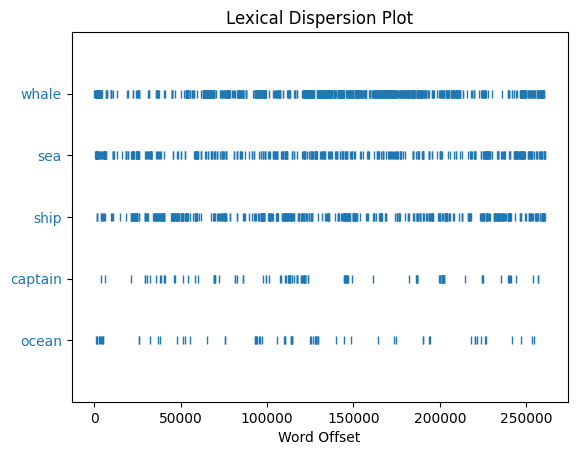

In [ ]:
# Import Text class for concordance and collocation analysis
from nltk.text import Text
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

# Create a Text object from the Gutenberg corpus
# Load a different book for variety
moby_dick = gutenberg.words('melville-moby_dick.txt')
text = Text(moby_dick)

print("Concordance Analysis - Finding context for specific words")
print("="*70)

# CONCORDANCE: Shows every occurrence of a word with surrounding context
print("\nConcordance for 'whale' (shows context where word appears):")
print("-"*70)
text.concordance('whale', width=70, lines=10)

print("\n" + "="*70)
print("\nConcordance for 'sea':")
print("-"*70)
text.concordance('sea', width=70, lines=10)

# SIMILAR WORDS: Find words used in similar contexts
print("\n" + "="*70)
print("\nSimilar Words - Words appearing in similar contexts:")
print("-"*70)
print("\nWords similar to 'whale':")
text.similar('whale')
print("\nWords similar to 'ship':")
text.similar('ship')

# COMMON CONTEXTS: Find contexts shared by two words
print("\n" + "="*70)
print("\nCommon Contexts - Contexts shared by two words:")
print("-"*70)
print("\nCommon contexts for 'whale' and 'sea':")
text.common_contexts(['whale', 'sea'])

# COLLOCATIONS: Find frequently co-occurring word pairs
print("\n" + "="*70)
print("\nCollocations - Word pairs that frequently appear together:")
print("-"*70)
print("Most significant collocations in Moby Dick:")
text.collocations(num=20)

# DISPERSION PLOT: Visual representation of where words appear in text
print("\n" + "="*70)
print("\nGenerating Dispersion Plot...")
print("Shows where specific words appear throughout the text")
words_to_plot = ['whale', 'sea', 'ship', 'captain', 'ocean']
try:
    text.dispersion_plot(words_to_plot)
except:
    print("Note: Dispersion plot requires GUI display (may not work in all environments)")

# LEXICAL DIVERSITY: Measure text complexity
print("\n" + "="*70)
print("\nLexical Diversity Analysis:")
print("-"*70)
total_words = len(moby_dick)
unique_words = len(set(moby_dick))
lexical_diversity = unique_words / total_words

print(f"Total words: {total_words:,}")
print(f"Unique words: {unique_words:,}")
print(f"Lexical diversity: {lexical_diversity:.4f}")
print(f"(Higher values indicate more diverse vocabulary)")

# Word frequency analysis
print("\n" + "="*70)
print("\nWord Frequency Analysis:")
print("-"*70)
fdist = FreqDist(word.lower() for word in moby_dick if word.isalpha())
print("Top 15 most common words:")
for word, freq in fdist.most_common(15):
    print(f"  {word:<15} {freq:>6} occurrences")

## Word Cloud Visualization

Word clouds provide intuitive visual representations of text data where word size reflects frequency or importance. For data scientists, this is a powerful exploratory data analysis tool for quickly identifying dominant themes, presenting findings to stakeholders, and gaining initial insights into large text datasets. It's particularly useful for communication and rapid pattern discovery.

Generating Word Cloud Visualization...
Word size indicates frequency - larger words appear more often in the text




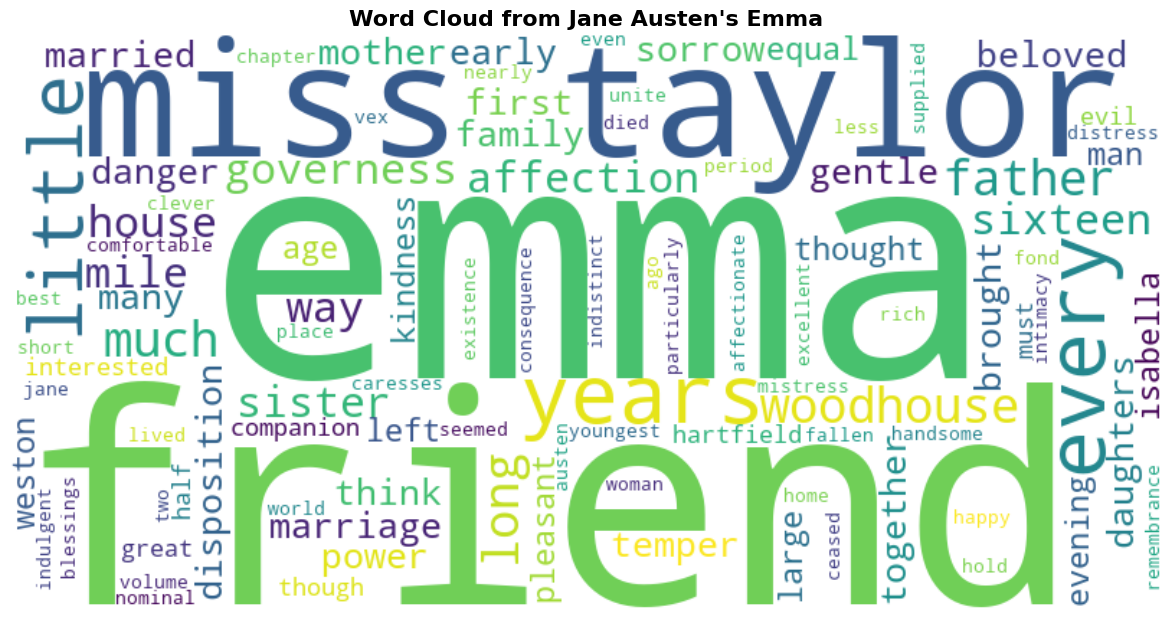


Top 20 Words in the Word Cloud:
--------------------------------------------------
  emma            1.0000
  friend          1.0000
  miss taylor     1.0000
  years           0.8571
  every           0.8571
  little          0.7143
  woodhouse       0.5714
  father          0.5714
  long            0.5714
  much            0.5714
  sister          0.4286
  house           0.4286
  governess       0.4286
  affection       0.4286
  sixteen         0.4286
  way             0.4286
  mile            0.4286
  disposition     0.2857
  daughters       0.2857
  marriage        0.2857


In [ ]:
# Import visualization libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg

# Use text from Gutenberg corpus (already loaded from earlier)
sample_text = gutenberg.raw('austen-emma.txt')[:5000]  # First 5000 characters

# Tokenize and preprocess
tokens = word_tokenize(sample_text.lower())
# Remove stopwords and punctuation
tokens = [token for token in tokens if token.isalpha() and token not in stopwords.words('english')]
# Rejoin into a single string for WordCloud
clean_text = ' '.join(tokens)

# Create word cloud object
# Parameters control appearance
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate(clean_text)

# Display the word cloud using matplotlib
print("Generating Word Cloud Visualization...")
print("Word size indicates frequency - larger words appear more often in the text")
print("\n")

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Jane Austen\'s Emma', fontsize=16, fontweight='bold')
plt.tight_layout(pad=0)
plt.show()

# Display word frequencies
print("\nTop 20 Words in the Word Cloud:")
print("-" * 50)
word_freq = wordcloud.words_
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
for word, freq in sorted_words:
    # Convert relative frequency to percentage
    print(f"  {word:<15} {freq:.4f}")

## Text Classification - Naive Bayes Classifier

Text classification automatically categorizes documents into predefined classes. This is fundamental for data scientists building spam filters, sentiment classifiers, topic categorization systems, and automated content moderation. Understanding feature extraction and probabilistic classifiers is essential for many NLP applications and forms the basis for more advanced deep learning approaches.

In [10]:
# Import classification utilities
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
import random

# Training data: movie reviews (text, sentiment)
training_data = [
    ("This movie was excellent and amazing", "positive"),
    ("I loved every minute of this film", "positive"),
    ("Best movie I've seen in years", "positive"),
    ("Absolutely fantastic and brilliant", "positive"),
    ("Great acting and wonderful story", "positive"),
    ("This was terrible and boring", "negative"),
    ("Worst movie ever, waste of time", "negative"),
    ("I hated this film completely", "negative"),
    ("Awful acting and poor plot", "negative"),
    ("Absolutely horrible experience", "negative"),
]

# Test data to evaluate the classifier
test_data = [
    ("The movie was great and entertaining", "positive"),
    ("I really enjoyed watching this", "positive"),
    ("This film was bad and disappointing", "negative"),
    ("Terrible waste of money", "negative"),
]

# Feature extraction function: creates a dictionary of words in the text
def extract_features(text):
    """
    Convert text into features (word presence dictionary)
    Returns: {'word': True} for each word in the text
    """
    words = word_tokenize(text.lower())
    return {word: True for word in words if word.isalpha()}

# Prepare training set with features
print("Extracting features from training data...")
training_set = [(extract_features(text), sentiment) for text, sentiment in training_data]

# Train the Naive Bayes classifier
print("Training Naive Bayes classifier...")
classifier = NaiveBayesClassifier.train(training_set)
print("Training complete!\n")

# Display most informative features (words that strongly indicate sentiment)
print("="*70)
print("Most Informative Features (words that indicate sentiment):")
print("-"*70)
classifier.show_most_informative_features(10)

# Test the classifier on test data
print("\n" + "="*70)
print("Testing Classifier on Test Data:")
print("-"*70)
test_set = [(extract_features(text), sentiment) for text, sentiment in test_data]

# Calculate accuracy
acc = accuracy(classifier, test_set)
print(f"Classifier Accuracy: {acc*100:.1f}%\n")

# Classify each test instance
print("Individual Test Results:")
for text, actual_sentiment in test_data:
    features = extract_features(text)
    predicted_sentiment = classifier.classify(features)
    # Get probability distribution
    prob_dist = classifier.prob_classify(features)
    confidence = prob_dist.prob(predicted_sentiment)
    
    print(f"\nText: \"{text}\"")
    print(f"  Actual: {actual_sentiment}")
    print(f"  Predicted: {predicted_sentiment}")
    print(f"  Confidence: {confidence:.2%}")

# Try on new unseen sentences
print("\n" + "="*70)
print("Classifying New Unseen Text:")
print("-"*70)
new_reviews = [
    "This movie was absolutely wonderful and delightful",
    "Boring and dull, complete waste of time",
    "An okay film, nothing special"
]

for review in new_reviews:
    features = extract_features(review)
    sentiment = classifier.classify(features)
    prob_dist = classifier.prob_classify(features)
    confidence = prob_dist.prob(sentiment)
    
    print(f"\nReview: \"{review}\"")
    print(f"  Sentiment: {sentiment.upper()}")
    print(f"  Confidence: {confidence:.2%}")

Extracting features from training data...
Training Naive Bayes classifier...
Training complete!

Most Informative Features (words that indicate sentiment):
----------------------------------------------------------------------
Most Informative Features
                       i = True           positi : negati =      1.7 : 1.0
                   movie = True           positi : negati =      1.7 : 1.0
                     and = None           negati : positi =      1.4 : 1.0
                     and = True           positi : negati =      1.4 : 1.0
                       i = None           negati : positi =      1.3 : 1.0
                   movie = None           negati : positi =      1.3 : 1.0
                 amazing = None           negati : positi =      1.2 : 1.0
                   awful = None           positi : negati =      1.2 : 1.0
                    best = None           negati : positi =      1.2 : 1.0
                  boring = None           positi : negati =      1.2 : 1

## Chunking and Chinking for Phrase Extraction

Chunking identifies meaningful phrase structures (noun phrases, verb phrases) in text using grammatical patterns. This is important for data scientists extracting structured information, building knowledge graphs, improving named entity recognition, and understanding the syntactic structure of documents. It bridges the gap between individual words and complete sentence understanding.

In [ ]:
# Import RegexpParser for creating custom phrase extraction patterns
from nltk import RegexpParser

# Sample text for chunking
text = "The quick brown fox jumps over the lazy dog in the beautiful park."

# Tokenize and perform POS tagging
tokens = word_tokenize(text)
tagged = nltk.pos_tag(tokens)
print("Tagged tokens:")
print(tagged)
print("\n" + "="*70)

# CHUNKING: Define grammar to extract noun phrases (NP)
# NP pattern: optional determiner (DT) + any number of adjectives (JJ) + one or more nouns (NN)
chunk_grammar = r"""
    NP: {<DT>?<JJ>*<NN.*>+}
    VP: {<VB.*><IN|TO>}
"""

# Create parser and apply chunking
chunk_parser = RegexpParser(chunk_grammar)
chunked = chunk_parser.parse(tagged)

print("CHUNKING - Extracting Noun Phrases (NP) and Verb Phrases (VP):")
print("-" * 70)
# Display the tree structure
chunked.pretty_print()

# Extract and display only the noun phrases
print("\nExtracted Noun Phrases:")
for subtree in chunked.subtrees():
    if subtree.label() == 'NP':
        # Join words in the phrase
        phrase = ' '.join(word for word, tag in subtree.leaves())
        print(f"  - {phrase}")

print("\n" + "="*70)

# CHINKING: Define grammar to exclude certain words from chunks
# Chink pattern: exclude verbs from noun phrases
chink_grammar = r"""
    NP: {<.*>+}
        }<VB.*>{
"""

# Create parser with chinking
chink_parser = RegexpParser(chink_grammar)
chinked = chink_parser.parse(tagged)

print("CHINKING - Extracting phrases but EXCLUDING verbs:")
print("-" * 70)
chinked.pretty_print()

print("\nExtracted Phrases (without verbs):")
for subtree in chinked.subtrees():
    if subtree.label() == 'NP':
        phrase = ' '.join(word for word, tag in subtree.leaves())
        print(f"  - {phrase}")

print("\n" + "="*70)
print("Summary:")
print("- Chunking: INCLUDES patterns that match (e.g., noun phrases)")
print("- Chinking: EXCLUDES patterns from chunks (opposite of chunking)")

Tagged tokens:
[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('in', 'IN'), ('the', 'DT'), ('beautiful', 'JJ'), ('park', 'NN'), ('.', '.')]

CHUNKING - Extracting Noun Phrases (NP) and Verb Phrases (VP):
----------------------------------------------------------------------
                                              S                                                                  
   ___________________________________________|___________________________________________________                
  |    |            NP                               VP                   NP                      NP             
  |    |     _______|________________          ______|_____        _______|______        _________|__________     
in/IN ./. The/DT quick/JJ brown/NN fox/NN jumps/VBZ     over/IN the/DT lazy/JJ dog/NN the/DT beautiful/JJ park/NN


Extracted Noun Phrases:
  - The quick brown fox
  - t

## N-grams Analysis (Bigrams and Trigrams)

N-grams capture word sequences and phrases that carry meaning beyond individual words. For data scientists, n-gram analysis is vital for feature engineering, text generation, identifying key phrases, autocomplete systems, and understanding contextual relationships in text. They reveal common expressions and domain-specific terminology.

In [ ]:
# Import n-gram utilities for finding word sequences
from nltk import bigrams, trigrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

# Sample text for n-gram analysis
text = """New York City is a bustling metropolis. The Statue of Liberty stands tall in New York Harbor. 
Many people visit New York every year. The Empire State Building is an iconic landmark. 
Central Park offers a peaceful escape from the city streets."""

# Tokenize and clean the text
tokens = word_tokenize(text.lower())
tokens = [token for token in tokens if token.isalpha()]

# Extract bigrams (2-word sequences)
print("BIGRAMS (2-word sequences):")
print("-" * 50)
bigram_list = list(bigrams(tokens))
print("Sample bigrams:", bigram_list[:10])

# Find most common bigrams using frequency
bigram_finder = BigramCollocationFinder.from_words(tokens)
# Get top 10 most frequent bigrams
print("\nTop 10 Most Frequent Bigrams:")
for bigram, freq in bigram_finder.ngram_fd.most_common(10):
    print(f"  {bigram[0]} {bigram[1]}: {freq}")

# Extract trigrams (3-word sequences)
print("\n" + "="*50)
print("TRIGRAMS (3-word sequences):")
print("-" * 50)
trigram_list = list(trigrams(tokens))
print("Sample trigrams:", trigram_list[:10])

# Find most common trigrams
trigram_finder = TrigramCollocationFinder.from_words(tokens)
print("\nTop 10 Most Frequent Trigrams:")
for trigram, freq in trigram_finder.ngram_fd.most_common(10):
    print(f"  {trigram[0]} {trigram[1]} {trigram[2]}: {freq}")

# Find collocations (meaningful word pairs that occur together frequently)
print("\n" + "="*50)
print("COLLOCATIONS (meaningful word combinations):")
bigram_measures = BigramAssocMeasures()
# Filter bigrams that appear at least 2 times
bigram_finder.apply_freq_filter(2)
# Get top collocations using PMI (Pointwise Mutual Information) score
top_collocations = bigram_finder.nbest(bigram_measures.pmi, 5)
print("Top 5 Collocations (by PMI score):")
for collocation in top_collocations:
    print(f"  {collocation[0]} {collocation[1]}")

BIGRAMS (2-word sequences):
--------------------------------------------------
Sample bigrams: [('new', 'york'), ('york', 'city'), ('city', 'is'), ('is', 'a'), ('a', 'bustling'), ('bustling', 'metropolis'), ('metropolis', 'the'), ('the', 'statue'), ('statue', 'of'), ('of', 'liberty')]

Top 10 Most Frequent Bigrams:
  new york: 3
  york city: 1
  city is: 1
  is a: 1
  a bustling: 1
  bustling metropolis: 1
  metropolis the: 1
  the statue: 1
  statue of: 1
  of liberty: 1

TRIGRAMS (3-word sequences):
--------------------------------------------------
Sample trigrams: [('new', 'york', 'city'), ('york', 'city', 'is'), ('city', 'is', 'a'), ('is', 'a', 'bustling'), ('a', 'bustling', 'metropolis'), ('bustling', 'metropolis', 'the'), ('metropolis', 'the', 'statue'), ('the', 'statue', 'of'), ('statue', 'of', 'liberty'), ('of', 'liberty', 'stands')]

Top 10 Most Frequent Trigrams:
  new york city: 1
  york city is: 1
  city is a: 1
  is a bustling: 1
  a bustling metropolis: 1
  bustling metr

## Stemming vs Lemmatization Comparison

Text normalization is essential for reducing vocabulary size and improving text analysis accuracy. Data scientists must understand the trade-offs between stemming (fast but crude) and lemmatization (accurate but slower) to choose the right approach for their use case, whether it's search engines, document clustering, or feature extraction for machine learning models.

In [ ]:
# Import stemming and lemmatization tools
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Create stemmer and lemmatizer objects
porter = PorterStemmer()
snowball = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

# Words to demonstrate differences
words = ['running', 'runs', 'ran', 'easily', 'fairly', 'better', 'worse', 
         'studying', 'studies', 'organization', 'organized', 'organizing']

# Compare stemming vs lemmatization
print("Comparison of Stemming vs Lemmatization:")
print("-" * 70)
print(f"{'Original':<15} {'Porter Stem':<15} {'Snowball Stem':<15} {'Lemma':<15}")
print("-" * 70)

for word in words:
    # Apply different techniques
    porter_stem = porter.stem(word)
    snowball_stem = snowball.stem(word)
    lemma = lemmatizer.lemmatize(word)
    
    print(f"{word:<15} {porter_stem:<15} {snowball_stem:<15} {lemma:<15}")

print("\n" + "="*70)
print("Key Differences:")
print("- Stemming: Fast but crude, may produce non-words (e.g., 'org' from 'organization')")
print("- Lemmatization: Slower but accurate, always produces valid words")
print("- Lemmatization considers word context and part of speech")

Comparison of Stemming vs Lemmatization:
----------------------------------------------------------------------
Original        Porter Stem     Snowball Stem   Lemma          
----------------------------------------------------------------------
running         run             run             running        
runs            run             run             run            
ran             ran             ran             ran            
easily          easili          easili          easily         
fairly          fairli          fair            fairly         
better          better          better          better         
worse           wors            wors            worse          
studying        studi           studi           studying       
studies         studi           studi           study          
organization    organ           organ           organization   
organized       organ           organ           organized      
organizing      organ           organ           o

## Sentiment Analysis using VADER

Sentiment analysis automatically determines the emotional tone of text (positive, negative, or neutral). This is critical for data scientists analyzing customer feedback, social media monitoring, brand reputation management, and understanding user opinions at scale. VADER is particularly effective for social media text and informal language.

In [ ]:
# Import VADER sentiment analyzer for analyzing emotional tone of text
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (dictionary of words with sentiment scores)
nltk.download('vader_lexicon')

# Create sentiment analyzer object
sia = SentimentIntensityAnalyzer()

# Define sample sentences with different sentiments
sentences = [
    "I absolutely love this product! It's amazing!",
    "This is the worst experience ever. I hate it.",
    "The weather is okay today.",
    "The movie was pretty good, but not great."
]

# Analyze sentiment for each sentence
print("Sentiment Analysis Results:")
print("-" * 60)
for sentence in sentences:
    # Get sentiment scores (neg, neu, pos, compound)
    # compound: overall sentiment (-1 to +1, negative to positive)
    scores = sia.polarity_scores(sentence)
    print(f"\nText: {sentence}")
    print(f"Negative: {scores['neg']:.2f}, Neutral: {scores['neu']:.2f}, Positive: {scores['pos']:.2f}")
    print(f"Compound Score: {scores['compound']:.2f}")
    
    # Classify based on compound score
    if scores['compound'] >= 0.05:
        sentiment = "POSITIVE"
    elif scores['compound'] <= -0.05:
        sentiment = "NEGATIVE"
    else:
        sentiment = "NEUTRAL"
    print(f"Overall Sentiment: {sentiment}")

Sentiment Analysis Results:
------------------------------------------------------------

Text: I absolutely love this product! It's amazing!
Negative: 0.00, Neutral: 0.31, Positive: 0.69
Compound Score: 0.87
Overall Sentiment: POSITIVE

Text: This is the worst experience ever. I hate it.
Negative: 0.56, Neutral: 0.43, Positive: 0.00
Compound Score: -0.83
Overall Sentiment: NEGATIVE

Text: The weather is okay today.
Negative: 0.00, Neutral: 0.68, Positive: 0.32
Compound Score: 0.23
Overall Sentiment: POSITIVE

Text: The movie was pretty good, but not great.
Negative: 0.33, Neutral: 0.37, Positive: 0.30
Compound Score: -0.34
Overall Sentiment: NEGATIVE


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zpoke\AppData\Roaming\nltk_data...
